In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('./data/airlines.csv', sep=',')

In [5]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0


In [6]:
df.shape

(539382, 8)

In [7]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
duplicated_cols = []
for col in df.columns:
    if df[col].duplicated().any():
        duplicated_cols.append(col)
print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


In [10]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


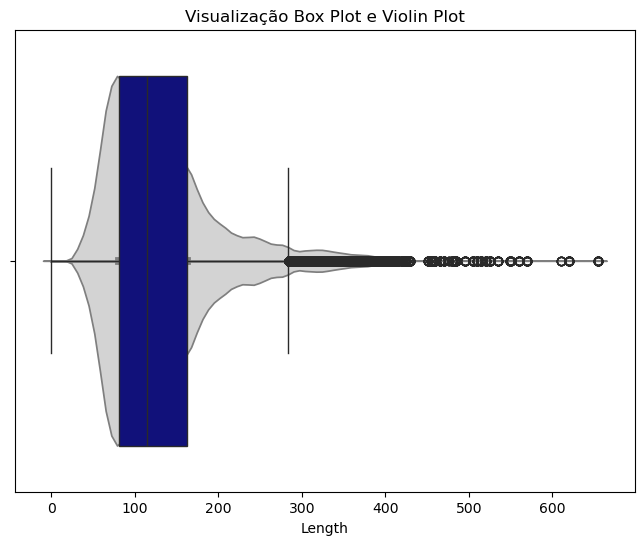

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show()

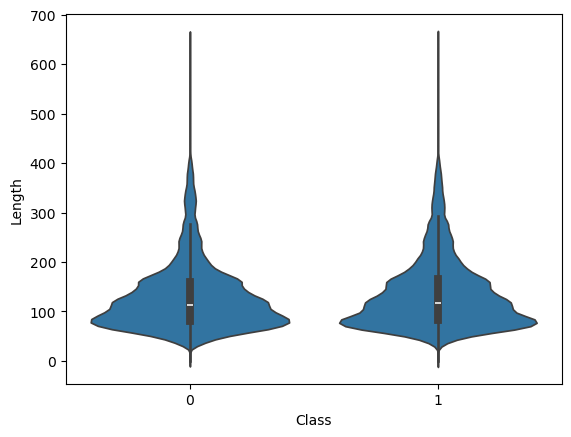

In [12]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()

In [13]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

<Axes: xlabel='Class', ylabel='Time'>

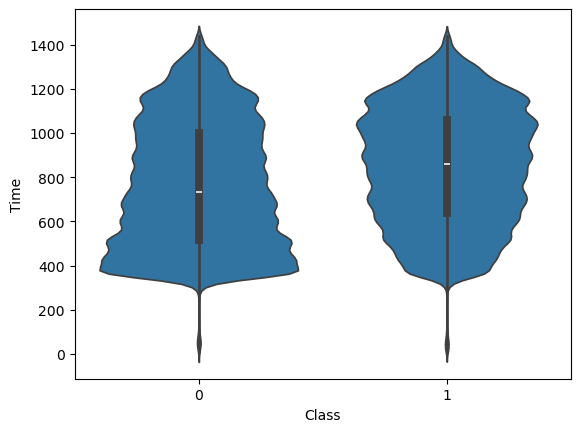

In [14]:
sns.violinplot(x='Class', y='Time', data=df)

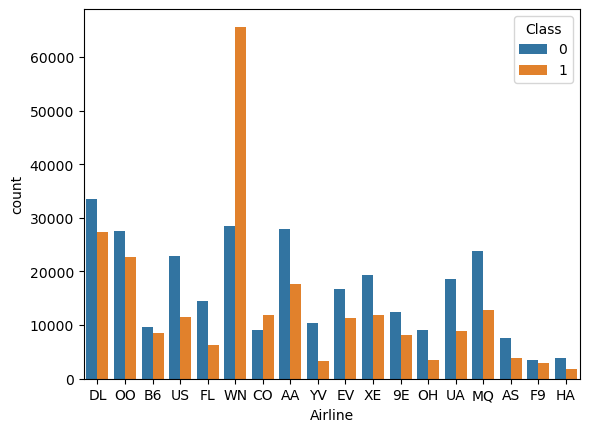

In [15]:
sns.countplot(x='Airline', hue='Class', data=df)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

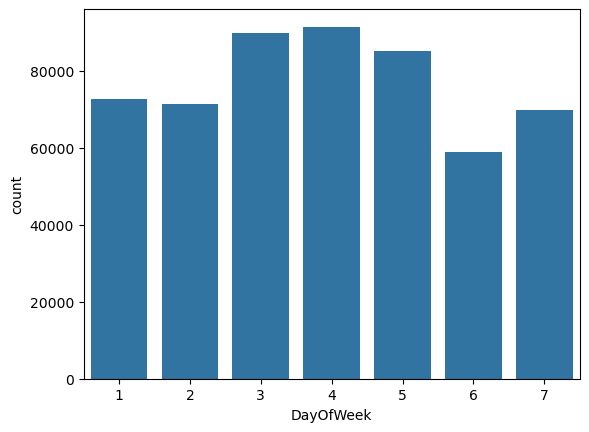

In [16]:
diaSemana = list(range(1,8))
sns.countplot(x='DayOfWeek', data=df, order=diaSemana)

<Axes: xlabel='Class', ylabel='count'>

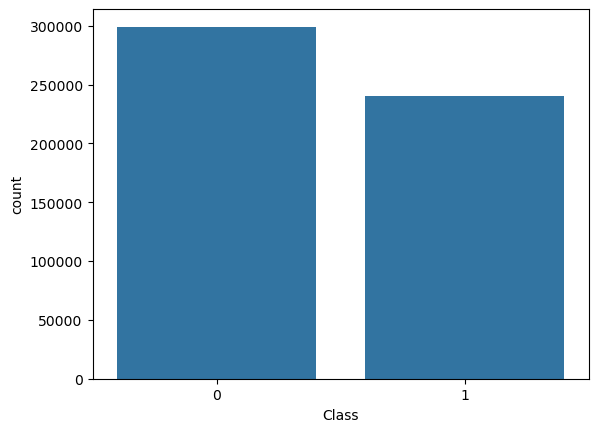

In [17]:
sns.countplot(x='Class', data=df)

In [18]:
from sklearn.preprocessing import LabelEncoder

df['AirportFrom']=LabelEncoder(). fit_transform(df['AirportFrom'])
df['AirportTo']=LabelEncoder().fit_transform(df['AirportFrom'])

In [19]:
df['Airline']=LabelEncoder().fit_transform(df['Airline'])

In [20]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,16,1,0
1,6948.0,360.0,146.0,12,65,65,4,0
2,1247.0,1170.0,143.0,3,35,35,3,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df[['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y =df['Class']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred = gnb.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))


Accuracy: 0.58


In [30]:
from sklearn.utils import resample

In [35]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

In [36]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=7)

In [37]:
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

<Axes: xlabel='Class', ylabel='count'>

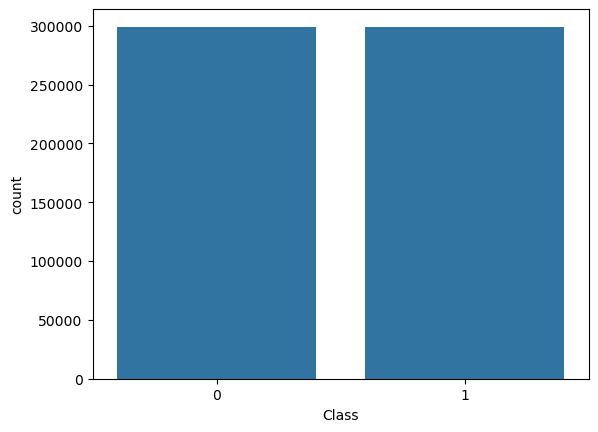

In [41]:
sns.countplot(x='Class', data=df_equilibrado)

In [44]:
x_equilibrado = df_equilibrado[['Flight', 'Time', 'Length', 'DayOfWeek']]
y_equilibrado = df_equilibrado['Class']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, stratify=y_equilibrado, random_state=7)

In [47]:
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

In [51]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print('Accuracy: ', round(accuracy_equilibrado,2))

Accuracy:  0.57


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)

In [55]:
rf = RandomForestClassifier(random_state=7)

In [56]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [57]:
y_pred_rf = rf.predict(x_test)

In [58]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', round(accuracy_equilibrado_rf,2))

Accuracy:  0.69
